                                                                                https://github.com/sidhantx/LinearRegression

# Linear Regression
dataset: https://www.kaggle.com/ishaanv/ISLR-Auto?select=Advertising.csv

Linear Regression is the process of fitting a line to a set of data, and the best fit line is called the regression line. For example let's we want to model increase in sales of a store by spending money on advertisment on TV. The sales here is the response variable, also denoted as $Y$, and  advertisement is the predictor, denoted as $X$. The model described here is called a bivariate linear model because there are only two variables $X$ and $Y$. The equation for this model can be written as :


$\hat{Y} = \hat{\beta_0} + \hat{\beta_1} X + \epsilon $

where: 

$\hat{\beta_0}$ is the intercept,

and  $\hat{\beta_1}$ is the called the slope of X. 

In general $\hat{beta_i} , i=0,1,2,3$ are also knows as parameters of the linear model.

$\epsilon $ is the mean-zero random error term

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Advertising.csv")

df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


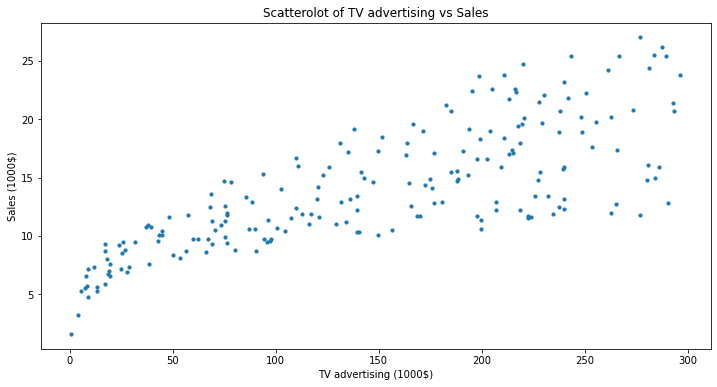

In [2]:



fig, ax =plt.subplots(figsize=(12,6))
ax.scatter(df["TV"].values, df["Sales"].values, s=10 )
ax.set_xlabel("TV advertising (1000$)")
ax.set_ylabel("Sales (1000$)")
plt.title("Scatterolot of TV advertising vs Sales")
plt.show()

### Linear Regression with statmodels

In [3]:
import statsmodels.formula.api as sm

regression_model = sm.ols(formula="Sales~TV",data=df)
results = regression_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 27 Nov 2021   Prob (F-statistic):           1.47e-42
Time:                        11:53:43   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$$ \hat{y} = 7.0326 + 0.0475X + \epsilon$$

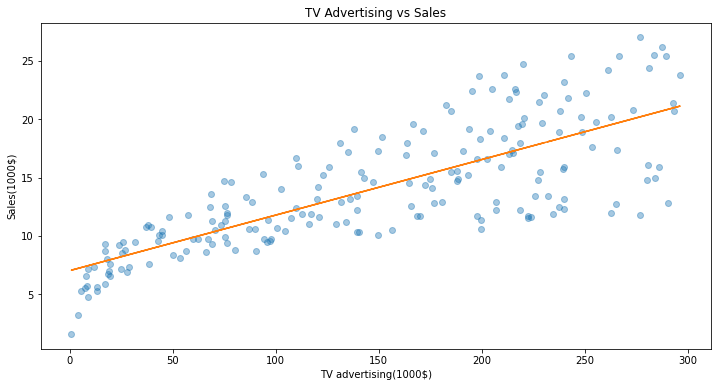

In [4]:
fig, axes = plt.subplots(figsize=(12,6))
axes.plot(df["TV"],df["Sales"], "o" ,alpha =0.4)
axes.plot(df["TV"],results.predict(df["TV"]))
axes.set_xlabel("TV advertising(1000$)")
axes.set_ylabel("Sales(1000$)")
axes.set_title("TV Advertising vs Sales")
plt.show()

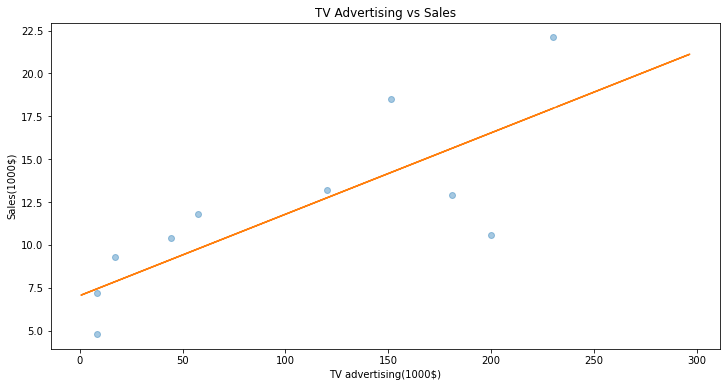

In [5]:
fig, axes = plt.subplots(figsize=(12,6))
axes.plot(df["TV"].iloc[0:10],df["Sales"].iloc[0:10], "o" ,alpha =0.4)
axes.plot(df["TV"],results.predict(df["TV"]))
axes.set_xlabel("TV advertising(1000$)")
axes.set_ylabel("Sales(1000$)")
axes.set_title("TV Advertising vs Sales")
plt.show()

### Linear Regression with sklearn
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv("Advertising.csv")
X= df.drop("Sales", axis=1)
y = df["Sales"]

print("\n\nAnd, the first few rows of our data:")
display(df.head())




And, the first few rows of our data:


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


#### divide the data into train, and test  

In [8]:
random_state=1
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, random_state=1)

#### train the model

In [9]:
#instantiate the LinearRegression class from sklearn
model = LinearRegression()

#train the model
model.fit(X_train[["Radio"]], y_train)

#predict on training 

y_pred_train = model.predict(X_train[["Radio"]])

rsquared_train = model.score(X_train[["Radio"]],y_train)

#predict on test
y_pred_test = model.predict(X_test[["Radio"]])
rsquared_test = model.score(X_test[["Radio"]],y_test)

print(f'The rsquared for train set is {rsquared_train:4f}')
print(f'The rsquared for test set is {rsquared_test:4f}')


The rsquared for train set is 0.320775
The rsquared for test set is 0.357139


#### Getting the intercept, and coef

In [10]:
model.coef_

array([0.20071881])

In [11]:
model.intercept_

9.1341254885822

$$y = 9.13 + 0.2X $$

### calculating other metrics 

##### residual

$ y - \hat{y} $

In [12]:
residual_train = y_train - y_pred_train
residual_test = y_test - y_pred_test

##### Sum squared error 
$$\sum{(y -\hat{y})^2}$$

or 

$$\sum{residuals_{i}^{2}}$$ 


In [13]:
sse_train = np.sum(residual_train**2)
sse_test = np.sum(residual_test**2)

print(f'The sse for train set is {sse_train:4f}')
print(f'The sse for test set is {sse_test:4f}')

The sse for train set is 3150.571996
The sse for test set is 477.625323


##### Mean squared Error (MSE) our loss function. This is the metric you

$$\frac{1}{n} \sum{(y -\hat{y})^2}$$

or 

$$ \frac{1}{n} sse  $$ 

In [14]:
mse_train = sse_train / len(X_train)
mse_test = sse_train / len(X_test)
print(f'The mse for train set is {mse_train:4f}')
print(f'The mse for test set is {mse_test:4f}')

The mse for train set is 19.691075
The mse for test set is 78.764300


##### SST - Sum squared total 

$$\sum{(y -{y_{avg}})^2}$$

In [15]:
sst_train =np.sum((y_train - np.mean(y_train))**2)
sst_test = np.sum((y_test - np.mean(y_test))**2)


##### $R^2$    aka score calculated by sklearn

$$ R^2 = 1 - \frac{sse}{sst}$$

In [16]:
rsq_train = 1 - (sse_train/sst_train)
rsq_test = 1 - (sse_test/sst_test)

print(f'The rsquared for train set is {rsq_train:4f}')
print(f'The rsquared for test set is {rsq_test:4f}')

The rsquared for train set is 0.320775
The rsquared for test set is 0.357139


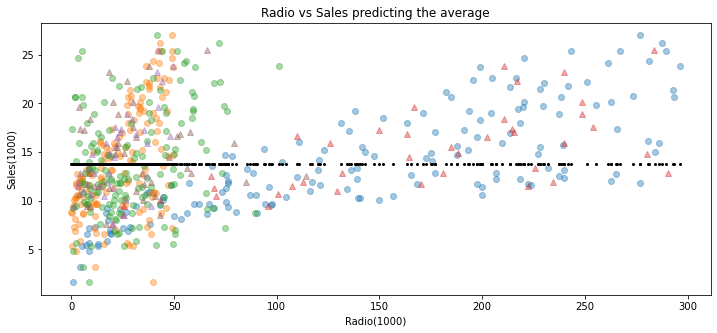

In [17]:
fig, axes = plt.subplots(figsize=(12,5))
#x = np.linspace(X_test.min(), X_test.max(),200)
y_avg = [np.mean(y_train) for i in range(X_train.shape[0])]


axes.plot(X_train,y_train, "o" ,alpha =0.4, label="Train")
axes.plot(X_test,y_test,"^",alpha=0.4, label="Test" )
axes.plot(X_train, y_avg , ".", color='black', label="y_avg", alpha=1, linewidth=1, markersize=4)

axes.set_xlabel("Radio(1000)")
axes.set_ylabel("Sales(1000)")
axes.set_title("Radio vs Sales predicting the average")
plt.show()


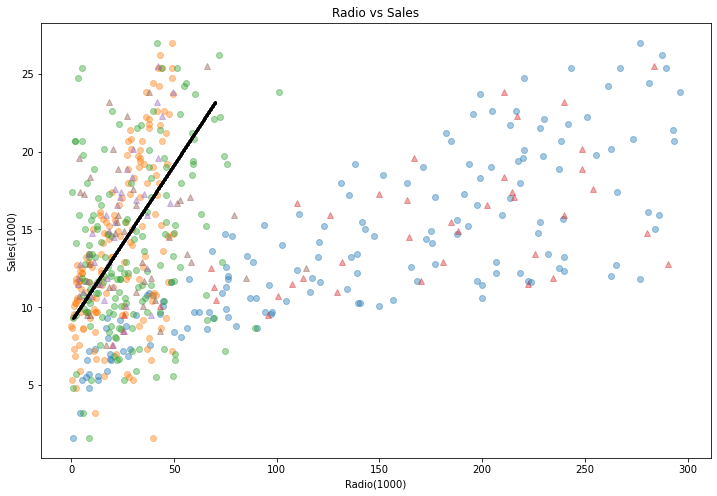

In [35]:
fig, axes = plt.subplots(figsize=(12,8))
x = np.linspace(1, 70,500)
temp = model.predict(x.reshape(-1,1))

axes.plot(X_train,y_train, "o" ,alpha =0.4, label="Train")
axes.plot(X_test,y_test,"^",alpha=0.4, label="Test" )
axes.plot(x, temp , ".", color='black', label="y_avg", alpha=1, linewidth=1, markersize=4)

axes.set_xlabel("Radio(1000)")
axes.set_ylabel("Sales(1000)")
axes.set_title("Radio vs Sales")
plt.show()